## Step 1: Ingest Data

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('/home/mariahwarren/flying-etiquette.csv')

In [9]:
df

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central
1036,3431731770,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Male,45-60,150000,Bachelor degree,Pacific
1037,3431731485,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,> 60,NaN,Some college or Associate degree,East North Central
1038,3431731196,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,30-44,"$50,000 - $99,999",Bachelor degree,New England


## Step 2: Overview Data

In [9]:
df.head()

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              1040 non-null   int64 
 1   How often do you travel by plane?                                                                                                         1040 non-null   object
 2   Do you ever recline your seat when you fly?                                                                                               858 non-null    object
 3   How tall are you?                                         

In [13]:
df.describe()

,RespondentID
count,1.040000e+03
mean,3.432711e+09
std,6.104183e+05
min,3.431730e+09
25%,3.432265e+09
50%,3.432672e+09
75%,3.433153e+09
max,3.436140e+09


In [15]:
df.describe(include=object)

,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?","On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
count,1040,858,858,851,856,856,856,855,855,855,...,850,849,849,849,849,1007,1007,826,1001,998
unique,6,5,20,2,5,5,2,3,3,6,...,3,3,3,2,2,2,4,5,5,9
top,Once a year or less,Once in a while,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Three times,...,"Yes, somewhat rude","No, not at all rude","Yes, very rude",No,No,Female,45-60,"$50,000 - $99,999",Bachelor degree,Pacific
freq,633,257,79,662,587,583,495,690,675,296,...,446,592,351,713,842,528,275,294,325,218


## Step 3: Clean Data

In [18]:
df.duplicated().sum()

0

In [15]:
df.isna().sum()

RespondentID                                                                                                                                  0
How often do you travel by plane?                                                                                                             0
Do you ever recline your seat when you fly?                                                                                                 182
How tall are you?                                                                                                                           182
Do you have any children under 18?                                                                                                          189
In a row of three seats, who should get to use the two arm rests?                                                                           184
In a row of two seats, who should get to use the middle arm rest?                                                                       

In [61]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 2 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              687 non-null    int64 
 1   How often do you travel by plane?                                                                                                         687 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               687 non-null    object
 3   How tall are you?                                               

In [63]:
df.dropna(inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 2 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              687 non-null    int64 
 1   How often do you travel by plane?                                                                                                         687 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               687 non-null    object
 3   How tall are you?                                               

In [28]:
df.describe()

,RespondentID
count,6.870000e+02
mean,3.432701e+09
std,5.905063e+05
min,3.431730e+09
25%,3.432267e+09
50%,3.432655e+09
75%,3.433129e+09
max,3.434276e+09


In [32]:
df.describe(include=object)

,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?","On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
count,687,687,687,687,687,687,687,687,687,687,...,687,687,687,687,687,687,687,687,687,687
unique,5,5,19,2,5,5,2,3,3,6,...,3,3,3,2,2,2,4,5,5,9
top,Once a year or less,Once in a while,"5'7""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Three times,...,"Yes, somewhat rude","No, not at all rude","Yes, somewhat rude",No,No,Female,45-60,"$50,000 - $99,999",Bachelor degree,Pacific
freq,500,199,62,533,478,477,391,561,537,239,...,362,476,285,574,682,344,206,254,239,156


In [67]:
df['RespondentID']=df['RespondentID'].astype('object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 2 to 1039
Data columns (total 27 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              687 non-null    object
 1   How often do you travel by plane?                                                                                                         687 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               687 non-null    object
 3   How tall are you?                                               

In [71]:
df['Height(inches)']=df['How tall are you?']
df['Height(inches)']=df['Height(inches)'].apply(lambda x: "5'0\"" if x < "5'0\"" else("6'6\"" if x > "6'6\"" else x))

In [73]:
df

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region),Height(inches)
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,"5'8"""
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,"5'11"""
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,"5'7"""
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,"Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,"5'9"""
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific,"6'2"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3431737008,Once a year or less,Never,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central,"5'4"""
1032,3431735911,Once a year or less,Always,"5'3""",No,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, very rude","Yes, very rude",Yes,No,Female,30-44,150000,High school degree,Middle Atlantic,"5'3"""
1034,3431734398,A few times per month,Once in a while,"6'1""",Yes,The person in the middle seat gets both arm rests,Other (please specify),Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"Yes, somewhat rude","Yes, somewhat rude",No,No,Male,30-44,150000,Graduate degree,Pacific,"6'1"""
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central,"5'7"""


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 2 to 1039
Data columns (total 28 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              687 non-null    object
 1   How often do you travel by plane?                                                                                                         687 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               687 non-null    object
 3   How tall are you?                                               

In [77]:
df['Height(inches)']=df['Height(inches)'].apply(lambda x: re.sub("[\"\']", "", x))

In [79]:
df

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region),Height(inches)
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,58
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,511
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,57
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,"Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,59
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3431737008,Once a year or less,Never,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central,54
1032,3431735911,Once a year or less,Always,"5'3""",No,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, very rude","Yes, very rude",Yes,No,Female,30-44,150000,High school degree,Middle Atlantic,53
1034,3431734398,A few times per month,Once in a while,"6'1""",Yes,The person in the middle seat gets both arm rests,Other (please specify),Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"Yes, somewhat rude","Yes, somewhat rude",No,No,Male,30-44,150000,Graduate degree,Pacific,61
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central,57


In [81]:
df['Height(inches)']=df['Height(inches)'].astype('int64')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 2 to 1039
Data columns (total 28 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              687 non-null    object
 1   How often do you travel by plane?                                                                                                         687 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               687 non-null    object
 3   How tall are you?                                               

In [85]:
df['Feet'] = df['Height(inches)'].astype(str).str[0].astype(int)
df['Inches'] = df['Height(inches)'].astype(str).str[1].astype(int)

In [87]:
df

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region),Height(inches),Feet,Inches
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,58,5,8
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,511,5,1
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,57,5,7
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,59,5,9
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,No,No,Male,30-44,150000,Some college or Associate degree,Pacific,62,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3431737008,Once a year or less,Never,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,No,No,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central,54,5,4
1032,3431735911,Once a year or less,Always,"5'3""",No,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,Yes,No,Female,30-44,150000,High school degree,Middle Atlantic,53,5,3
1034,3431734398,A few times per month,Once in a while,"6'1""",Yes,The person in the middle seat gets both arm rests,Other (please specify),Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,No,No,Male,30-44,150000,Graduate degree,Pacific,61,6,1
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central,57,5,7


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 2 to 1039
Data columns (total 30 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              687 non-null    object
 1   How often do you travel by plane?                                                                                                         687 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               687 non-null    object
 3   How tall are you?                                               

In [91]:
df['Height(inches)'] = df['Feet'] * 12 + df['Inches']

In [93]:
df

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region),Height(inches),Feet,Inches
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,68,5,8
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,61,5,1
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,67,5,7
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,69,5,9
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,No,No,Male,30-44,150000,Some college or Associate degree,Pacific,74,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3431737008,Once a year or less,Never,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,No,No,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central,64,5,4
1032,3431735911,Once a year or less,Always,"5'3""",No,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,Yes,No,Female,30-44,150000,High school degree,Middle Atlantic,63,5,3
1034,3431734398,A few times per month,Once in a while,"6'1""",Yes,The person in the middle seat gets both arm rests,Other (please specify),Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,No,No,Male,30-44,150000,Graduate degree,Pacific,73,6,1
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central,67,5,7


In [95]:
df.drop(['Feet', 'Inches'],axis=1,inplace=True)

In [97]:
df

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region),Height(inches)
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific,68
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific,61
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific,67
5,3434245875,Once a year or less,Usually,"5'9""",Yes,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"Yes, somewhat rude","No, not at all rude",...,"Yes, very rude","Yes, very rude",No,No,Male,30-44,"$25,000 - $49,999",Graduate degree,East North Central,69
6,3434235351,Once a month or less,Once in a while,"6'2""",Yes,The person in the middle seat gets both arm rests,Whoever puts their arm on the arm rest first,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Male,30-44,150000,Some college or Associate degree,Pacific,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,3431737008,Once a year or less,Never,"5'4""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"No, not at all rude","Yes, somewhat rude",No,No,Female,> 60,"$50,000 - $99,999",Graduate degree,West North Central,64
1032,3431735911,Once a year or less,Always,"5'3""",No,Whoever puts their arm on the arm rest first,Whoever puts their arm on the arm rest first,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, very rude","Yes, very rude",Yes,No,Female,30-44,150000,High school degree,Middle Atlantic,63
1034,3431734398,A few times per month,Once in a while,"6'1""",Yes,The person in the middle seat gets both arm rests,Other (please specify),Everyone in the row should have some say,"No, not rude at all","Yes, somewhat rude",...,"Yes, somewhat rude","Yes, somewhat rude",No,No,Male,30-44,150000,Graduate degree,Pacific,73
1035,3431732652,Once a year or less,Once in a while,"5'7""",No,Other (please specify),Other (please specify),Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Some college or Associate degree,East North Central,67


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687 entries, 2 to 1039
Data columns (total 28 columns):
 #   Column                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                    --------------  ----- 
 0   RespondentID                                                                                                                              687 non-null    object
 1   How often do you travel by plane?                                                                                                         687 non-null    object
 2   Do you ever recline your seat when you fly?                                                                                               687 non-null    object
 3   How tall are you?                                               

In [87]:
def is_outlier(column: pd.Series):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return ~column.between(lower_bound,upper_bound)

In [89]:
df[df.select_dtypes(include=np.number).apply(is_outlier)==False]

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region),Height(inches)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
1034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67


In [82]:
df.describe()

,Height(inches)
count,687.000000
mean,66.429403
std,4.448003
min,60.000000
25%,63.000000
50%,66.000000
75%,69.000000
max,78.000000


In [84]:
df.describe(include=object)

,RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?",...,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
count,687,687,687,687,687,687,687,687,687,687,...,687,687,687,687,687,687,687,687,687,687
unique,687,5,5,19,2,5,5,2,3,3,...,3,3,3,2,2,2,4,5,5,9
top,3431729581,Once a year or less,Once in a while,"5'7""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude","No, not at all rude","Yes, somewhat rude",No,No,Female,45-60,"$50,000 - $99,999",Bachelor degree,Pacific
freq,1,500,199,62,533,478,477,391,561,537,...,362,476,285,574,682,344,206,254,239,156


## Step 4: Analysis

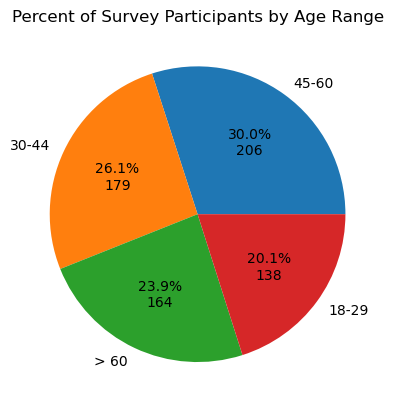

In [93]:
fig, ax = plt.subplots()
total = df['Age'].value_counts().values.sum()

def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)

plt.pie(df['Age'].value_counts().values, labels=df['Age'].value_counts().index, autopct=fmt)
ax.set_title('Percent of Survey Participants by Age Range')
plt.show()

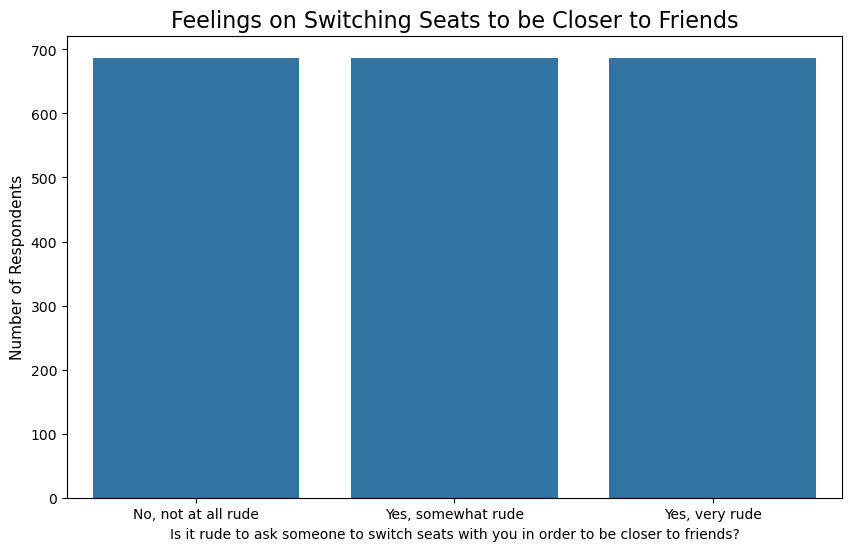

In [115]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df,x='Is it rude to ask someone to switch seats with you in order to be closer to friends?',y=len(df['Is it rude to ask someone to switch seats with you in order to be closer to friends?']))
plt.title('Feelings on Switching Seats to be Closer to Friends',fontsize=16)
plt.ylabel('Number of Respondents',fontsize=11)
plt.show()

<Figure size 1200x800 with 0 Axes>

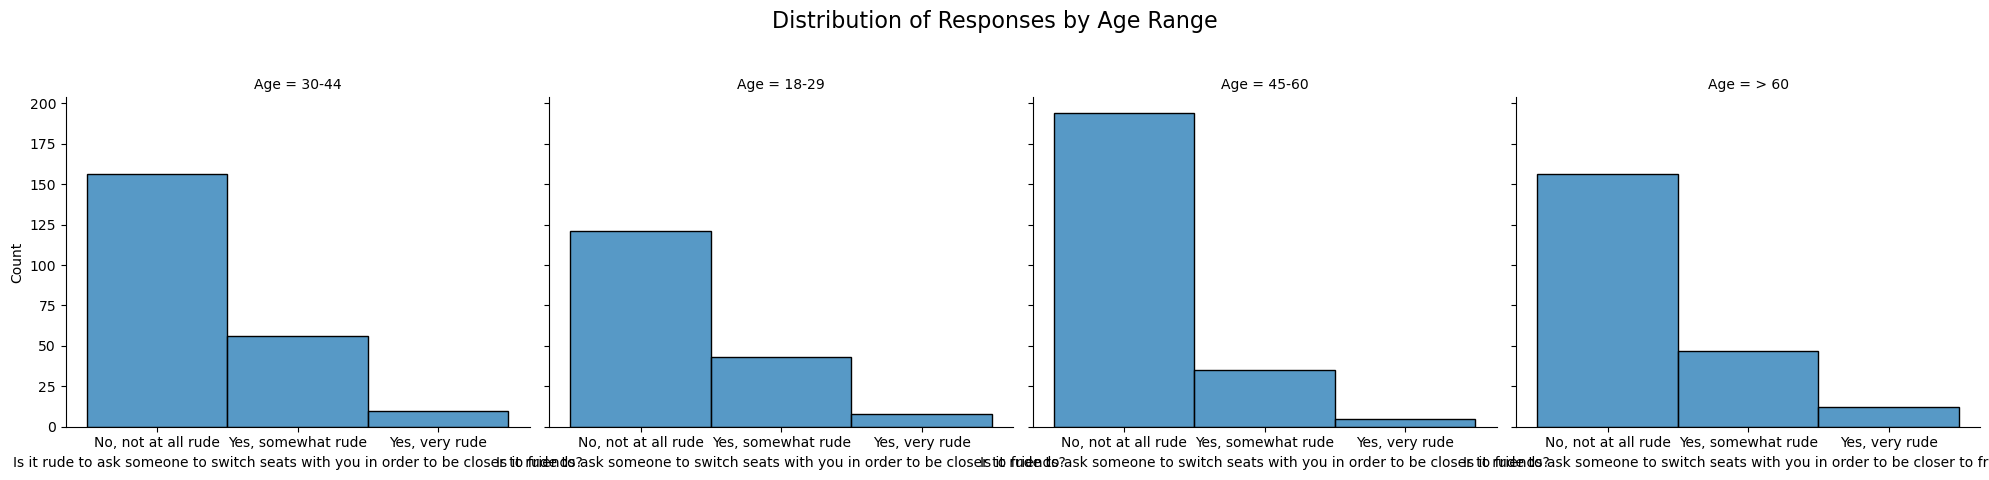

In [51]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='Is it rude to ask someone to switch seats with you in order to be closer to friends?',col='Age')
plt.suptitle('Distribution of Responses by Age Range', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

<Figure size 1200x800 with 0 Axes>

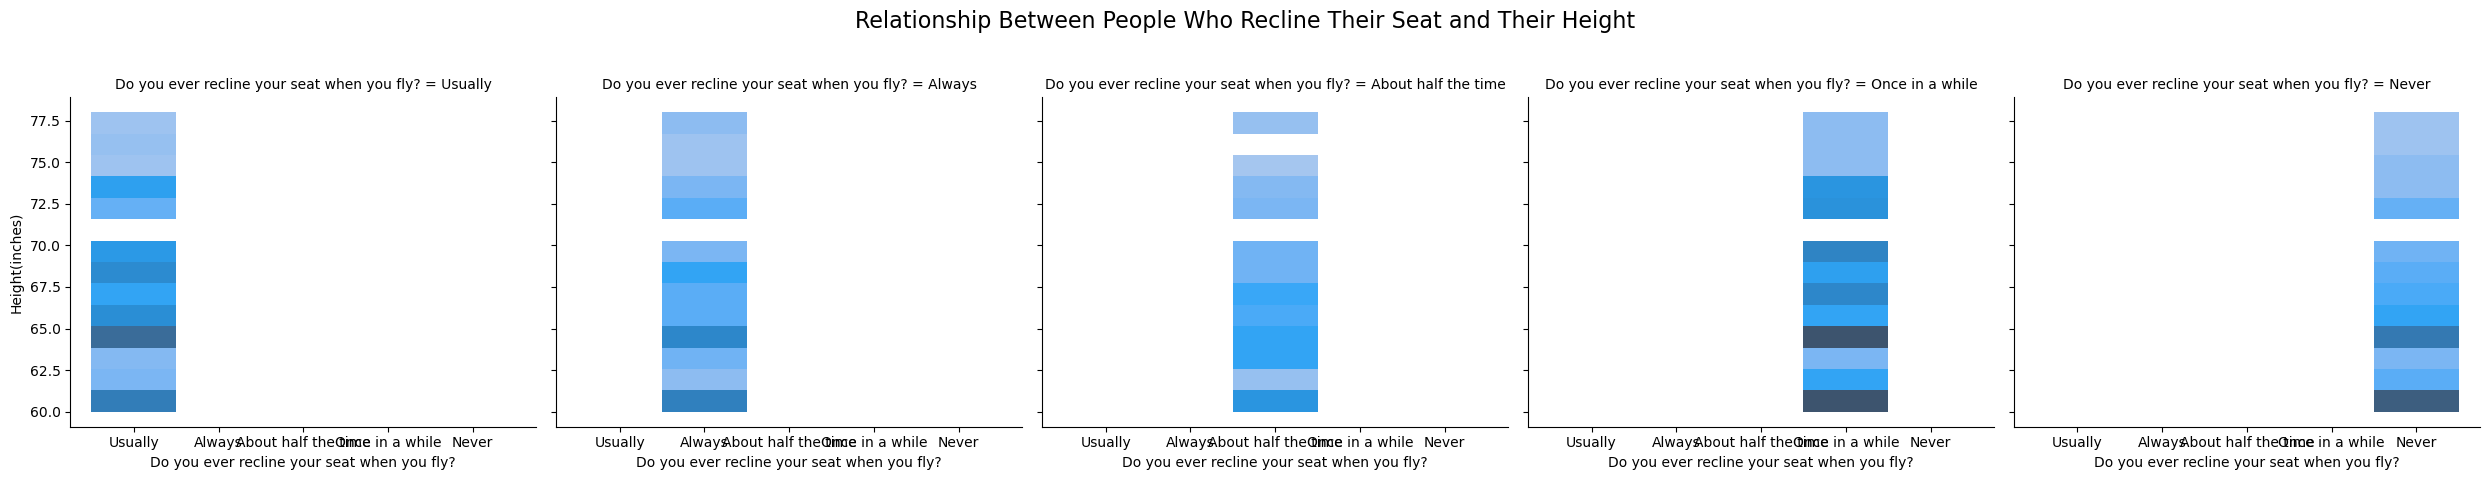

In [111]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='Do you ever recline your seat when you fly?',y='Height(inches)',col='Do you ever recline your seat when you fly?')
plt.suptitle('Relationship Between People Who Recline Their Seat and Their Height',fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()